<a href="https://colab.research.google.com/github/ezahner/IDS/blob/main/HW3/Project3_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import and Cleanse Data**

In [111]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ezahner/IDS/main/HW3/Life_Expectancy_Mac.csv')

In [112]:
from tabulate import tabulate

After importing the data file, I had to cleanse the data of all 0 and null values. First, I dropped all 0s as I did in SQL in the previous part, as can be seen below. Then I filled in the null values with the average of the column, as can be seen in the second cell block under this.

In [113]:
#delete all rows that contain 0s
df = df[df != 0].dropna(how='all')

In [114]:
#replace null values with mean of Life_Expectancy
average_LE = df[df['Life_Expectancy '].notnull() & (df['Life_Expectancy '] != 0)]['Life_Expectancy '].mean()

df['Life_Expectancy '].fillna(average_LE, inplace=True)

#replace null values with mean of Adult_Mortality
average_AM = df[df['Adult_Mortality'].notnull() & (df['Adult_Mortality'] != 0)]['Adult_Mortality'].mean()

df['Adult_Mortality'].fillna(average_AM, inplace=True)

#replace null values with mean of Alcohol
average_Alcohol = df[df['Alcohol'].notnull() & (df['Alcohol'] != 0)]['Alcohol'].mean()

df['Alcohol'].fillna(average_Alcohol, inplace=True)

#replace null values with mean of Perccentage_Expenditure
average_PE = df[df['Percentage_Expenditure'].notnull() & (df['Percentage_Expenditure'] != 0)]['Percentage_Expenditure'].mean()

df['Percentage_Expenditure'].fillna(average_PE, inplace=True)

#replace null values with mean of BMI
average_BMI = df[df[' BMI '].notnull() & (df[' BMI '] != 0)][' BMI '].mean()

df[' BMI '].fillna(average_BMI, inplace=True)

#replace null values with mean of Total_Expenditure
average_TE = df[df['Total_Expenditure'].notnull() & (df['Total_Expenditure'] != 0)]['Total_Expenditure'].mean()

df['Total_Expenditure'].fillna(average_TE, inplace=True)

#replace null values with mean of GDP
average_GDP = df[df['GDP'].notnull() & (df['GDP'] != 0)]['GDP'].mean()

df['GDP'].fillna(average_GDP, inplace=True)

#replace null values with mean of Population
average_Population = df[df['Population'].notnull() & (df['Population'] != 0)]['Population'].mean()

df['Population'].fillna(average_Population, inplace=True)


#replace null values with mean of Schooling
average_Schooling = df[df['Schooling'].notnull() & (df['Schooling'] != 0)]['Schooling'].mean()

df['Schooling'].fillna(average_Schooling, inplace=True)



Then, to be sure that I had cleaned the data properly of all 0s and null values, I did a null and 0 check on the dataframe, as can be seen below.

In [115]:
# Check for NaN values in the DataFrame
nan_check = df.isnull().values.any()

# Check for 0s in the DataFrame
zero_check = (df == 0).values.any()

if nan_check:
    print("DataFrame contains NaN values.")
else:
    print("DataFrame does not contain NaN values.")

if zero_check:
    print("DataFrame contains 0 values.")
else:
    print("DataFrame does not contain 0 values.")

DataFrame does not contain NaN values.
DataFrame does not contain 0 values.


___________________________________________________________________________________________________________________________________________

In [116]:
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒══════╤══════════════════════════════════════════════════════╤════════╤════════════════════╤═══════════════════╤═══════════╤══════════════════════════╤═════════╤═════════════════════╤══════════════╤══════════════════╤═════════════╕
│      │ Country                                              │   Year │   Life_Expectancy  │   Adult_Mortality │   Alcohol │   Percentage_Expenditure │    BMI  │   Total_Expenditure │          GDP │       Population │   Schooling │
╞══════╪══════════════════════════════════════════════════════╪════════╪════════════════════╪═══════════════════╪═══════════╪══════════════════════════╪═════════╪═════════════════════╪══════════════╪══════════════════╪═════════════╡
│    0 │ Afghanistan                                          │   2010 │            58.8    │           279     │   0.01    │                79.6794   │ 16.7    │             9.2     │    553.329   │      2.88317e+06 │      9.2    │
├──────┼──────────────────────────────────────────────────────┼─────

**Correlation Analysis**

In [117]:
from scipy.stats import pearsonr

#correlation of Adult_Mortality and Life_Expectancy

data1 = df['Adult_Mortality']
data2 = df['Life_Expectancy ']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: -0.75772


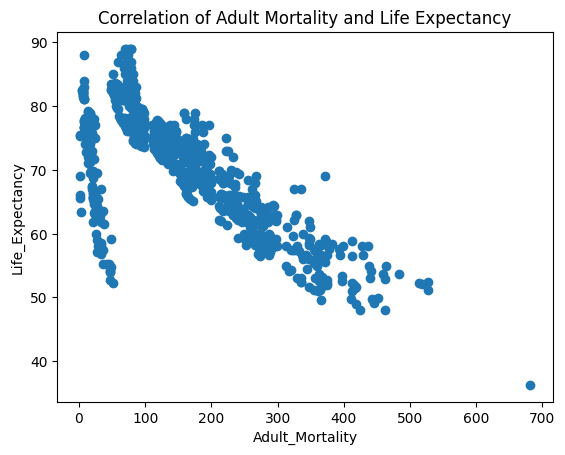

In [118]:
import matplotlib.pyplot as plt

#scatterplot of Adult_Mortality and Life_Expectancy

x = data1
y = data2

plt.scatter(x, y)

plt.xlabel('Adult_Mortality')
plt.ylabel('Life_Expectancy')
plt.title('Correlation of Adult Mortality and Life Expectancy')

plt.show()

From the result of the correlation between Adult Mortality and Life Expectancy, as well as the scatterplot, it is clear that there is a negative correlation between the two. As the Adulty Mortality increases, the Life Expectancy decreases. From the correlation equation I got the result of -.75, which is a fairly strong negative correlation. This shows, that as there is a greater rate in Adult Mortality, there will likely be a lower Life Expectancy.

_________________________________________________________________________________________________________________________

After the correlation analysis of Adult Mortality and Life Expectancy, I preformed correlation and linear regression analyses on other factors of Life Expectancy, including BMI, Alcohol, Schooling, Population, GDP, and Total Expediture. I plotted the linear regression models for those that had the highest correlations, as well as Population which had the least correlation to show contrast. Further analysis can be found below.

In [119]:
#correlation of Eating Habits and Life_Expectancy
data1 = df[' BMI ']
data2 = df['Life_Expectancy ']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.50721


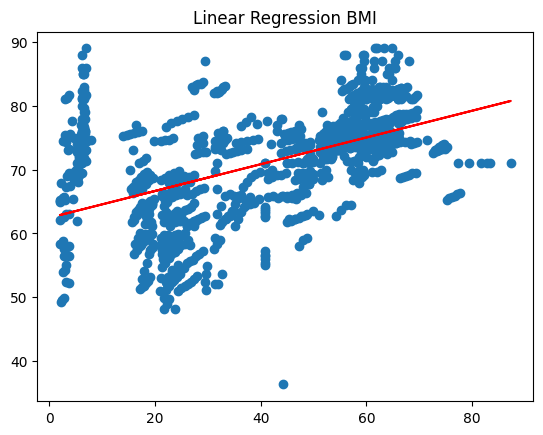

MSE:  55.066117791158526
R2:  0.25725783842606587


In [120]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LRdata = df;

X = LRdata.iloc[:, 6].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y = LRdata.iloc[:, 2].values.reshape(-1,1)

LRmodel = LinearRegression()


# Perform linear regression
LRmodel.fit(X, Y)


# Make predictions
Y_pred = LRmodel.predict(X)

#plot Linear Regression of BMI
plt.scatter(X, Y)
plt.title('Linear Regression BMI')
plt.plot(X, Y_pred, color='red')

plt.show()

#Calculate MSE and R2 for BMI and Life_Expectancy

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

#code edited from Chapter 3 Colab

In [121]:
#correlation of Drinking Alcohol and Life_Expectancy
data1 = df['Alcohol']
data2 = df['Life_Expectancy ']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.41681


In [122]:
#Calculate MSE and R2 for Alcohol and Life_Expectancy
X = LRdata.iloc[:, 4].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y = LRdata.iloc[:, 2].values.reshape(-1,1)

LRmodel = LinearRegression()

# Perform linear regression
LRmodel.fit(X, Y)

# Make predictions
Y_pred = LRmodel.predict(X)

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

MSE:  61.258759317654
R2:  0.17373032390823184


In [123]:
#correlation of Schooling and Life_Expectancy (Social Factor)
data1 = df['Schooling']
data2 = df['Life_Expectancy ']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.75765


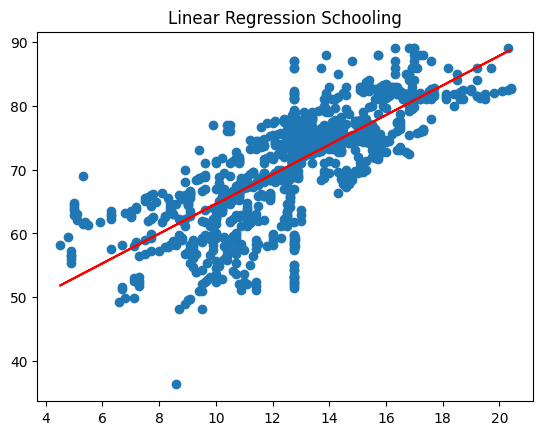

MSE:  31.580326749209085
R2:  0.5740386086072549


In [124]:
#Calculate MSE and R2 for Schooling and Life_Expectancy
X = LRdata.iloc[:, 10].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y = LRdata.iloc[:, 2].values.reshape(-1,1)

LRmodel = LinearRegression()

# Perform linear regression
LRmodel.fit(X, Y)

# Make predictions
Y_pred = LRmodel.predict(X)

#plot linear regression
plt.scatter(X, Y)
plt.title('Linear Regression Schooling')
plt.plot(X, Y_pred, color='red')

plt.show()

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

In [125]:
#correlation of Population and Life_Expectancy (Social Factor)
data1 = df['Population']
data2 = df['Life_Expectancy ']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: -0.03039


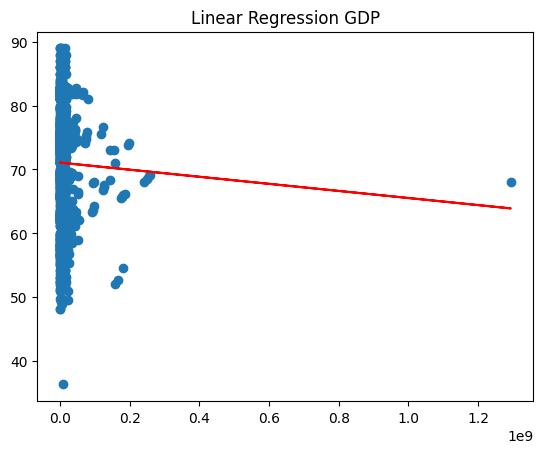

MSE:  74.0704738402332
R2:  0.0009235069457963485


In [133]:
#Calculate MSE and R2 for Population and Life_Expectancy
X = LRdata.iloc[:, 9].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y = LRdata.iloc[:, 2].values.reshape(-1,1)

LRmodel = LinearRegression()

# Perform linear regression
LRmodel.fit(X, Y)

# Make predictions
Y_pred = LRmodel.predict(X)

#plot linear regression
plt.scatter(X, Y)
plt.title('Linear Regression Population')
plt.plot(X, Y_pred, color='red')

plt.show()

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

In [127]:
#correlation of GDP and Life_Expectancy (Economic Factor)
data1 = df['GDP']
data2 = df['Life_Expectancy ']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.43146


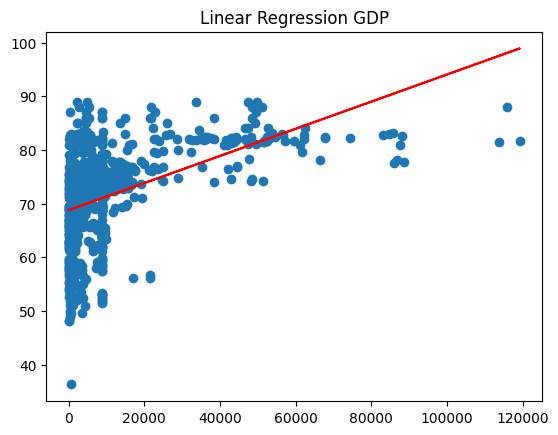

MSE:  60.33735543257178
R2:  0.1861583929412456


In [132]:

X = LRdata.iloc[:, 8].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y = LRdata.iloc[:, 2].values.reshape(-1,1)

LRmodel = LinearRegression()

# Perform linear regression
LRmodel.fit(X, Y)

# Make predictions
Y_pred = LRmodel.predict(X)

#plot linear regression
plt.scatter(X, Y)
plt.title('Linear Regression GDP')
plt.plot(X, Y_pred, color='red')

plt.show()

#Calculate MSE and R2 for GDP and Life_Expectancy
print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

In [129]:
#correlation of Total_Expenditure and Life_Expectancy (Economic Factor)
data1 = df['Total_Expenditure']
data2 = df['Life_Expectancy ']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.21846


In [130]:
#Calculate MSE and R2 for Total_Expenditure and Life_Expectancy
X = LRdata.iloc[:, 7].values.reshape(-1,1)

# Save the second column (all the rows) in Y
Y = LRdata.iloc[:, 2].values.reshape(-1,1)

LRmodel = LinearRegression()

# Perform linear regression
LRmodel.fit(X, Y)

# Make predictions
Y_pred = LRmodel.predict(X)

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

MSE:  70.60054892550633
R2:  0.04772650732141559


I preformed corelation analysis on various factors of the dataframe by calculating pearson's r, R2, and MSE. Additionally, there are Linear Regression models for those with the strongest correlations. The strongest correlation was between Schooling and Life Expectancy with a correlation of 0.75. The next strongest correlation was BMI and Life Expectancy with a correlation of 0.51. Both of these correlations were positive, indicating that Schooling and BMI correlate to a higher Life Expectancy. We cannot say they *cause* a higher life expectancy (because correlation does not equal causation), but we can say that there is a positive trend. Out of this anaylsis, the only negative correlation was that of Population with Life Expectancy. However, it is a very **weak** negative correlation, only -0.03. This means that although they are indeed negative correlated, there is not a strong relationship between the two. In fact, it would probably be more fit to say there is no correlation.